In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import math

In [2]:
df = pd.read_csv('covid-data.csv')

In [3]:
print(df.head(5))

  iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-02-24          1.0        1.0   
1      AFG      Asia  Afghanistan  2020-02-25          1.0        0.0   
2      AFG      Asia  Afghanistan  2020-02-26          1.0        0.0   
3      AFG      Asia  Afghanistan  2020-02-27          1.0        0.0   
4      AFG      Asia  Afghanistan  2020-02-28          1.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           NaN         NaN                  NaN  ...   
1                 NaN           NaN         NaN                  NaN  ...   
2                 NaN           NaN         NaN                  NaN  ...   
3                 NaN           NaN         NaN                  NaN  ...   
4                 NaN           NaN         NaN                  NaN  ...   

   gdp_per_capita  extreme_poverty  cardiovasc_death_rate  \
0        1803.987              NaN   

In [4]:
covid = df[['location', 'date', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths']].copy()

In [5]:
covid = covid[covid['location'] == 'Greece']

In [6]:
print(covid.head(25))

      location        date  total_cases  new_cases  total_deaths  new_deaths
32116   Greece  2020-02-26          1.0        1.0           NaN         NaN
32117   Greece  2020-02-27          3.0        2.0           NaN         NaN
32118   Greece  2020-02-28          4.0        1.0           NaN         NaN
32119   Greece  2020-02-29          4.0        0.0           NaN         NaN
32120   Greece  2020-03-01          7.0        3.0           NaN         NaN
32121   Greece  2020-03-02          7.0        0.0           NaN         NaN
32122   Greece  2020-03-03          7.0        0.0           NaN         NaN
32123   Greece  2020-03-04          9.0        2.0           NaN         NaN
32124   Greece  2020-03-05         31.0       22.0           NaN         NaN
32125   Greece  2020-03-06         45.0       14.0           NaN         NaN
32126   Greece  2020-03-07         46.0        1.0           NaN         NaN
32127   Greece  2020-03-08         73.0       27.0           NaN         NaN

In [7]:
covid['total_deaths'] = covid['total_deaths'].fillna(0)
covid['new_deaths'] = covid['total_deaths'].fillna(0)

In [20]:
print(covid.head(1))
print(covid.tail(1))
covid.info()

      location        date  total_cases  new_cases  total_deaths  new_deaths
32116   Greece  2020-02-26          1.0        1.0           0.0         0.0
      location        date  total_cases  new_cases  total_deaths  new_deaths
32564   Greece  2021-05-19     383558.0     2292.0       11587.0     11587.0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 449 entries, 32116 to 32564
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   location      449 non-null    object 
 1   date          449 non-null    object 
 2   total_cases   449 non-null    float64
 3   new_cases     449 non-null    float64
 4   total_deaths  449 non-null    float64
 5   new_deaths    449 non-null    float64
dtypes: float64(4), object(2)
memory usage: 24.6+ KB


In [16]:
dates = covid['date'][0::28]

C:\Users\Dimitris Theo\anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


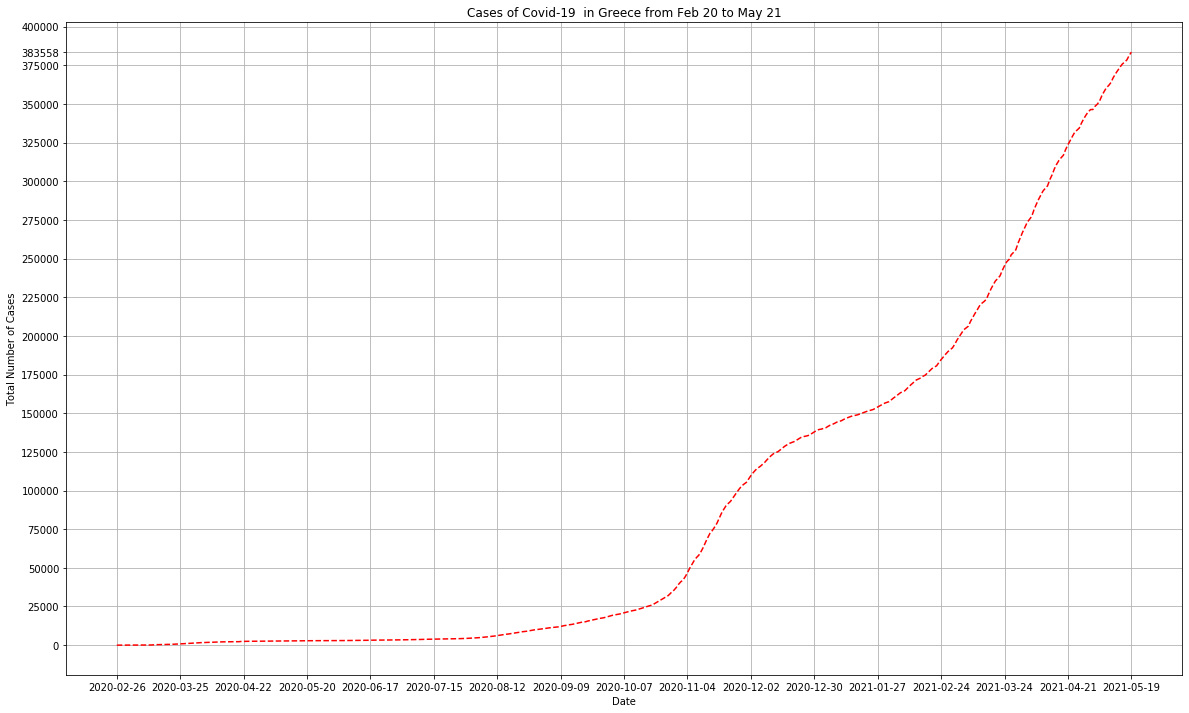

In [17]:
cases = [0, 25000, 50000, 75000, 100000, 125000, 150000,
         175000, 200000, 225000, 250000, 275000, 300000, 
         325000, 350000,375000, 383558, 400000]

plt.figure(figsize = (20,12))
plt.plot(covid['date'], covid['total_cases'],linestyle='dashed',color='red')
plt.title('Cases of Covid-19  in Greece from Feb 20 to May 21')
plt.xlabel('Date')
plt.ylabel('Total Number of Cases')
ax1 = plt.subplot()
ax1.set_xticks(dates)
ax1.set_yticks(cases)
plt.grid()
plt.show()

In [ ]:
# We can see a huge increase in the number of cases of Covid-19 in Greece in November of 2020. From about 25.000 at the start 
# of November 2020, the total number of cases where quadrupled in just one month, reaching more than 100.000.

# The cases kept increasing with lower tension in December 2020 and January 2021.

# In February 2021 we had another huge increase. From about 175.000 in February 2021 the number of cases climbed to 375.000 
# in just three months.


C:\Users\Dimitris Theo\anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


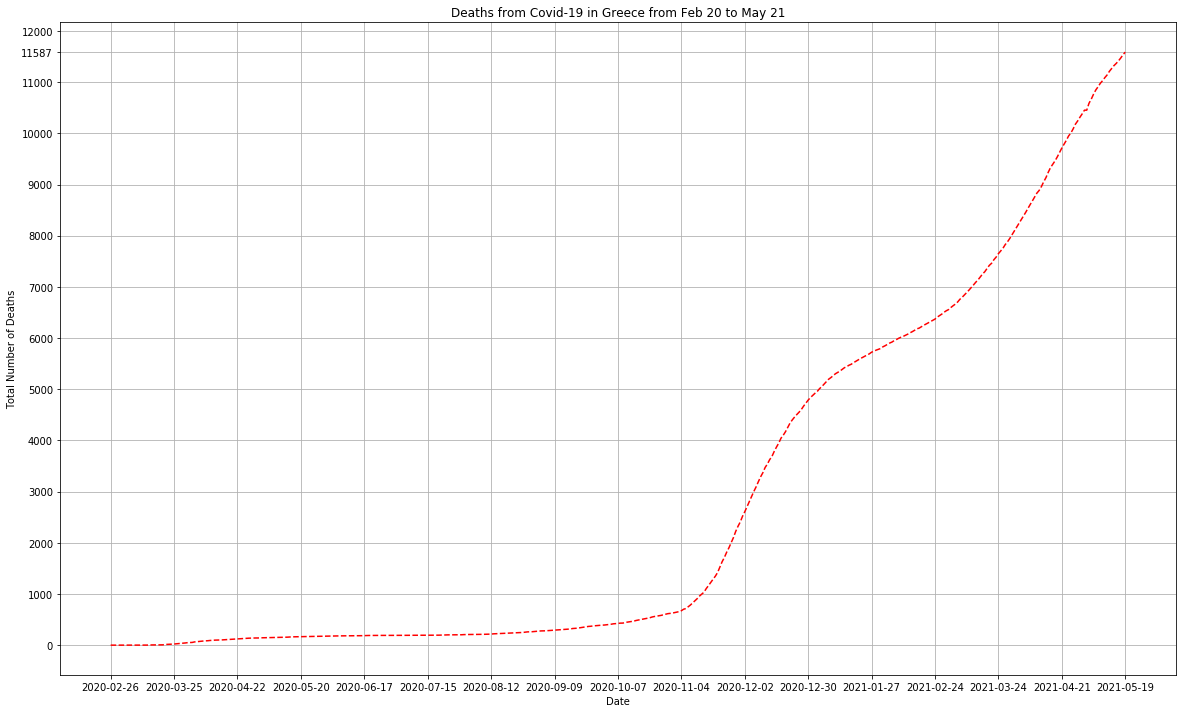

In [18]:
deaths = cases = [0, 1000, 2000, 3000, 4000, 5000, 6000,
         7000, 8000, 9000, 10000, 11000, 11587, 12000]

plt.figure(figsize = (20,12))
plt.plot(covid['date'], covid['total_deaths'],linestyle='dashed',color='red')
plt.title('Deaths from Covid-19 in Greece from Feb 20 to May 21')
plt.xlabel('Date')
plt.ylabel('Total Number of Deaths')
ax2 = plt.subplot()
ax2.set_xticks(dates)
ax2.set_yticks(deaths)
plt.grid()
plt.show()

In [19]:
# We can notice that the graph showing the number of deaths moves similarly to the graph with the number of cases
# and this is something we expected. 